<a href="https://colab.research.google.com/github/hosseinghafourishoreh/Google-Colab/blob/main/CNN_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rasterio
!pip install earthpy
!pip install rasterio
!pip install tensorflow tensorflow_addons tensorflow_datasets tensorflow_hub numpy matplotlib seaborn sklearn

  Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
import keras
from keras import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Input, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras import Model
import rasterio
import earthpy.plot as ep
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import from_levels_and_colors
import os
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from osgeo import gdal, ogr
import numpy as np
import skimage.exposure
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from rasterio.plot import show
from rasterio.mask import mask
import sys
import os
import subprocess
import datetime
import platform
import datetime
import glob
from osgeo import gdal
import geopandas as gpd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization, Input, Lambda
import tensorflow.keras.backend as K

In [ ]:
#Parameter
FEATURES = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
LABEL = ['ID_CLASS']
SPLIT = ['sample']
labels = ['label']
CLASSES = [1,2,3,4,5]
N_CLASSES = 5
PALETTE = ['#FF0000','#d20cf5','#FFFF00','#000080','#228B22']
SAMPLE_PATH = '/content/drive/MyDrive/Colab Notebooks/Karaj_FirstPaper/CNN_KARAJ1000.csv'
IMAGE_PATH = '/content/drive/MyDrive/Colab Notebooks/Karaj_FirstPaper/DATASET20.tif'

20


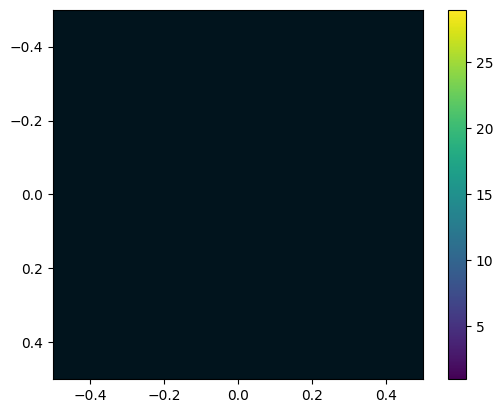

In [ ]:
dataset = gdal.Open(r'/content/drive/MyDrive/Colab Notebooks/Karaj_FirstPaper/DATASET20.tif')
print(dataset.RasterCount)

band4 = dataset.GetRasterBand(3) #Red Channel
band6 = dataset.GetRasterBand(2) #Green Channel
band8 = dataset.GetRasterBand(1) #Blue Channel

#Read the band as Numpy arrays

b4 = band4.ReadAsArray()
b6 = band6.ReadAsArray()
b8 = band8.ReadAsArray()

#Plot the arrays using imshow()

img = np.dstack((1,20,29))
f=plt.figure()
plt.imshow(img)
plt.colorbar();

#ep.plot_bands(img, [], [], figsize = plot_size)

In [ ]:
# Image load
image = rasterio.open(IMAGE_PATH)
bandNum = image.count
height = image.height
width = image.width
crs = image .crs
transform = image.transform
shape = (height,width)
image_vis = []
plot_size = (9,9)

In [ ]:
# @title Default title text
samples = pd.read_csv(SAMPLE_PATH)
sample = samples.sample(frac = 1) #shuffle data
sample

,sample,label,ID_CLASS,1,2,3,4,5,6,7,...,11,12,13,14,15,16,17,18,19,20
4826,test,Vegetation,5,0.0887,0.0991,0.2628,0.1632,0.0762,0.0809,0.0644,...,0.553786,0.459869,0.249676,0.2000,0.204158,0.199609,0.182633,0.365318,0.255179,0.187488
2762,test,Shale,3,0.1311,0.1683,0.1589,0.1632,0.1361,0.1380,0.1121,...,0.601548,0.498736,0.268210,0.2157,0.225794,0.222321,0.229833,0.235667,0.262618,0.234591
2233,train,Shale,3,0.1126,0.1526,0.2139,0.2107,0.1470,0.1571,0.1312,...,0.609105,0.499914,0.269683,0.2165,0.215314,0.215486,0.233957,0.278200,0.306636,0.251900
2294,train,Shale,3,0.1152,0.1652,0.1772,0.1751,0.1306,0.1285,0.1169,...,0.605478,0.498029,0.269560,0.2157,0.220014,0.222200,0.242079,0.261164,0.278457,0.242436
1506,train,Ferric Oxide,2,0.1868,0.2501,0.2750,0.3235,0.2559,0.2428,0.2123,...,0.620290,0.512634,0.279748,0.2239,0.228842,0.228776,0.241076,0.297458,0.357248,0.294867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,train,Ferric Oxide,2,0.1921,0.2407,0.2505,0.3057,0.2504,0.2190,0.2218,...,0.571017,0.470469,0.258636,0.2076,0.247607,0.258843,0.279207,0.298679,0.377750,0.334236
4744,test,Vegetation,5,0.1152,0.1243,0.3728,0.1988,0.0925,0.1190,0.0882,...,0.547740,0.450446,0.244643,0.1952,0.205333,0.200612,0.182991,0.382009,0.271924,0.197945
4732,test,Vegetation,5,0.0808,0.0928,0.2933,0.2107,0.1143,0.1285,0.1025,...,0.616965,0.511692,0.276679,0.2185,0.213791,0.211252,0.201933,0.362018,0.349512,0.291685
4212,train,Vegetation,5,0.0940,0.1085,0.3606,0.1988,0.0980,0.1047,0.0930,...,0.575249,0.478949,0.258391,0.2067,0.196012,0.192833,0.181921,0.391927,0.299603,0.224300


In [ ]:
#Split into train and test based on column
train = samples[samples['sample'] == 'train']
test = samples[samples['sample'] == 'test']

#split between features and label
train_features = train[FEATURES]
train_label = train[LABEL]
test_features = test[FEATURES]
test_label = test[LABEL]

#Function to reshape input
def reshape_input(array):
  shape = array.shape
  return array.reshape(shape[0], shape[1], 1)

#convert samples dataframe(pandas) to numpy array
train_input = reshape_input(train_features.to_numpy())
test_input = reshape_input(test_features.to_numpy())

#Also make data to categoricl
train_output = to_categorical(train_label.to_numpy(),N_CLASSES + 1,dtype=int)
test_output = to_categorical(test_label.to_numpy(),N_CLASSES + 1,dtype=int)


# Show the data shape
print(f'train features:{train_input.shape}\nTest features:{test_input.shape}\nTrain label:{train_output.shape}\nTest label:{test_output.shape}')

train features:(3500, 20, 1)
Test features:(1500, 20, 1)
Train label:(3500, 6)
Test label:(1500, 6)


In [ ]:
train_input = train_input / np.max(train_input)
test_input = test_input / np.max(test_input)

In [ ]:
print("NaN values in train_input:", np.isnan(train_input).sum())
print("NaN values in test_input:", np.isnan(test_input).sum())
print("Inf values in train_input:", np.isinf(train_input).sum())
print("Inf values in test_input:", np.isinf(test_input).sum())
print("Max value in train_input:", np.max(train_input))
print("Min value in train_input:", np.min(train_input))


NaN values in train_input: 0
NaN values in test_input: 0
Inf values in train_input: 0
Inf values in test_input: 0
Max value in train_input: 1.0
Min value in train_input: 0.0


In [ ]:
print(f"NaN values in train_input: {np.isnan(train_input).sum()}")
print(f"NaN values in test_input: {np.isnan(test_input).sum()}")


NaN values in train_input: 0
NaN values in test_input: 0


In [ ]:
def print_shape(x):
    print(K.int_shape(x))
    return x

from keras.models import Sequential
from keras.layers import Input, Conv3D, MaxPooling3D, Dropout, GlobalMaxPooling3D, Dense, BatchNormalization
from keras.regularizers import l2

#Input shape
train_shape = train_input.shape
input_shape = (train_shape[1],train_shape[2])

# Model parameters
neuron = 86
drop = 0.4
kernel = 4
pool = 4

#Make sequential model
model = Sequential([
    Input(input_shape),
    Conv1D(neuron * 1, kernel, activation='relu'),
    Conv1D(neuron * 1, kernel, activation='relu'),
    Dropout(drop),
    Conv1D(neuron *2, kernel, activation='relu'),
    Conv1D(neuron *2, kernel, activation='relu'),
    Dropout(drop),
    Conv1D(neuron *4, kernel, activation='relu'),
    Conv1D(neuron *4, kernel, activation='relu'),
    Dropout(drop),
    GlobalMaxPooling1D(),
    Dense(neuron *4, activation='relu'),
    Dropout(drop),
    Dense(neuron *2, activation='relu'),
    Dropout(drop),
    Dense(neuron *1, activation='relu'),
    Dropout(drop),
    Dense(N_CLASSES + 1, activation='softmax')
])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 17, 86)            430       
                                                                 
 conv1d_8 (Conv1D)           (None, 14, 86)            29670     
                                                                 
 dropout_6 (Dropout)         (None, 14, 86)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 11, 172)           59340     
                                                                 
 conv1d_10 (Conv1D)          (None, 8, 172)            118508    
                                                                 
 dropout_7 (Dropout)         (None, 8, 172)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 5, 344)           

In [ ]:
# Check the shape of train_output and test_output
print("Shape of train_output:", train_output.shape)
print("Shape of test_output:", test_output.shape)

# Check unique values in train_output and test_output
print("Unique values in train_output:", np.unique(train_output))
print("Unique values in test_output:", np.unique(test_output))


Shape of train_output: (3500, 6)
Shape of test_output: (1500, 6)
Unique values in train_output: [0 1]
Unique values in test_output: [0 1]


In [ ]:
#Train the model
#Compile the model
model.compile(
    optimizer = 'Adam',
    loss = 'CategoricalCrossentropy',
    metrics = ['accuracy']
)
#Create callback to stop training if loss not decreasing
stop = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=16         # Increase patience to give more room for training improvement
)
#Fit the model
result = model.fit(
    x=train_input, y=train_output,
    validation_data = (test_input, test_output),
    batch_size = 8,
    callbacks = [stop],
    epochs = 45,
)


Epoch 1/45
438/438 [==============================] - 25s 51ms/step - loss: 1.5550 - accuracy: 0.2509 - val_loss: 1.0377 - val_accuracy: 0.4587
Epoch 2/45
438/438 [==============================] - 22s 51ms/step - loss: 0.9562 - accuracy: 0.5326 - val_loss: 0.9016 - val_accuracy: 0.5680
Epoch 3/45
438/438 [==============================] - 18s 41ms/step - loss: 0.8642 - accuracy: 0.5740 - val_loss: 0.8454 - val_accuracy: 0.5707
Epoch 4/45
438/438 [==============================] - 12s 28ms/step - loss: 0.8404 - accuracy: 0.5700 - val_loss: 0.9899 - val_accuracy: 0.5873
Epoch 5/45
438/438 [==============================] - 12s 28ms/step - loss: 0.8016 - accuracy: 0.5783 - val_loss: 0.8869 - val_accuracy: 0.5300
Epoch 6/45
438/438 [==============================] - 11s 25ms/step - loss: 0.8051 - accuracy: 0.5780 - val_loss: 0.7598 - val_accuracy: 0.5907
Epoch 7/45
438/438 [==============================] - 12s 27ms/step - loss: 0.7766 - accuracy: 0.5803 - val_loss: 1.2414 - val_accuracy:

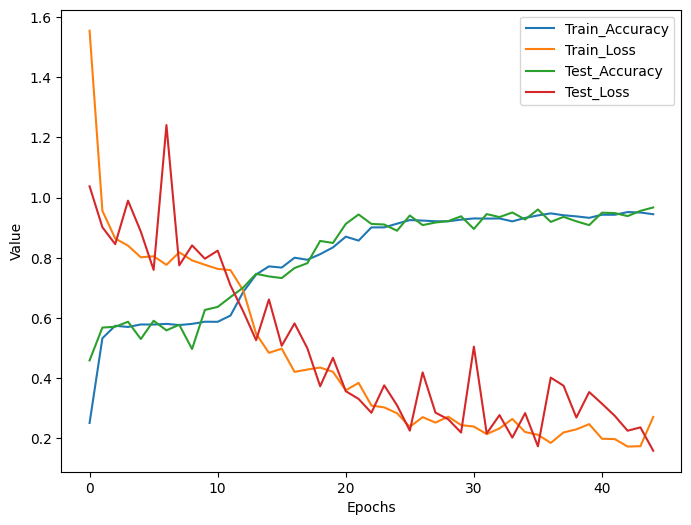

In [ ]:
#Show history
history = pd.DataFrame(result.history)

plt.figure(figsize = (8, 6))
plt.plot(range(len(history['accuracy'].values.tolist())), history['accuracy'].values.tolist(), label = 'Train_Accuracy')
plt.plot(range(len(history['loss'].values.tolist())),history['loss'].values.tolist(),label = 'Train_Loss')
plt.plot(range(len(history['val_accuracy'].values.tolist())),history['val_accuracy'].values.tolist(),label = 'Test_Accuracy')
plt.plot(range(len(history['val_loss'].values.tolist())), history['val_loss'].values.tolist(), label = 'Test_Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

47/47 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       300
           2       0.97      0.94      0.95       300
           3       0.96      0.99      0.98       300
           4       0.96      0.96      0.96       300
           5       0.98      0.99      0.99       300

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



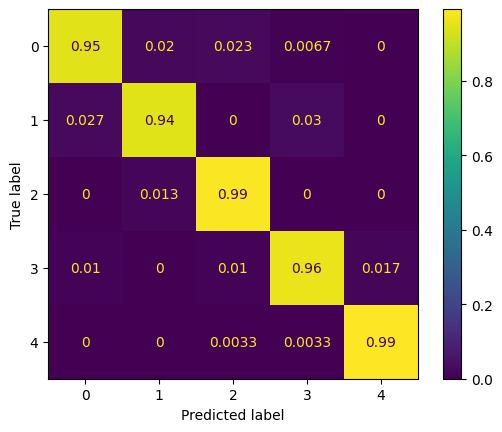

In [ ]:
# Predict test data
prediction = np.argmax(model.predict(test_input),1).flatten()
label = np.argmax(test_output, 1).flatten()

#Confusion matrix
cm = confusion_matrix(label, prediction, normalize = 'true')
cm = ConfusionMatrixDisplay(cm)
cm.plot()

#Classification report
print(classification_report(label, prediction))

19/19 [==============================] - 70s 4s/step


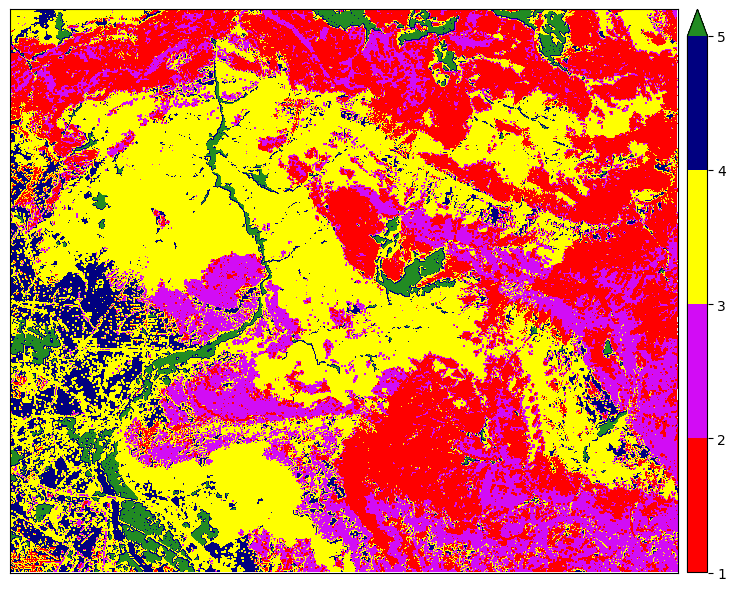

<Axes: >

In [ ]:
# Predict image using the model
image_input = []
for x in range(20):
  image_input.append(image.read(x + 1))
image_input = reshape_input(np.stack(image_input).reshape(20, -1).T)

# Predict
prediction = model.predict(image_input, batch_size =1024*20)
prediction = np.argmax(prediction, 1)
prediction = prediction.reshape(shape[0], shape[1])

# Visualize
cmap, norm = from_levels_and_colors(CLASSES, PALETTE, extend= 'max')
ep.plot_bands(prediction, cmap=cmap, norm=norm, figsize=plot_size)

In [ ]:
# Save file to drive
save_location = '/content/drive/MyDrive/Colab Notebooks/Cuprite_Nevada/'
name = 'MPM.tif'
location = save_location + name

new_dataset = rasterio.open(
    location,
    mode='w',driver='GTiff',
    height = prediction.shape[0], width = prediction.shape[1],
    count=1, dtype=str(prediction.dtype),
    crs=crs,
    transform=transform
)
new_dataset.write(prediction, 1);
new_dataset.close()